<ipython-input-1-711879b23b30>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values)


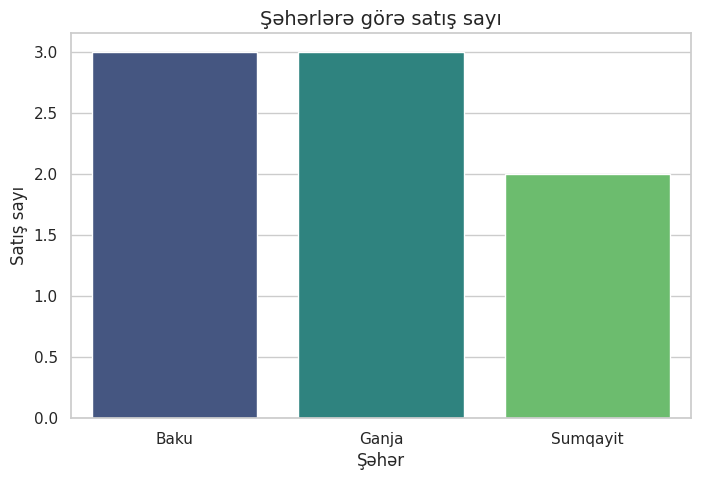

<ipython-input-1-711879b23b30>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='cubehelix')


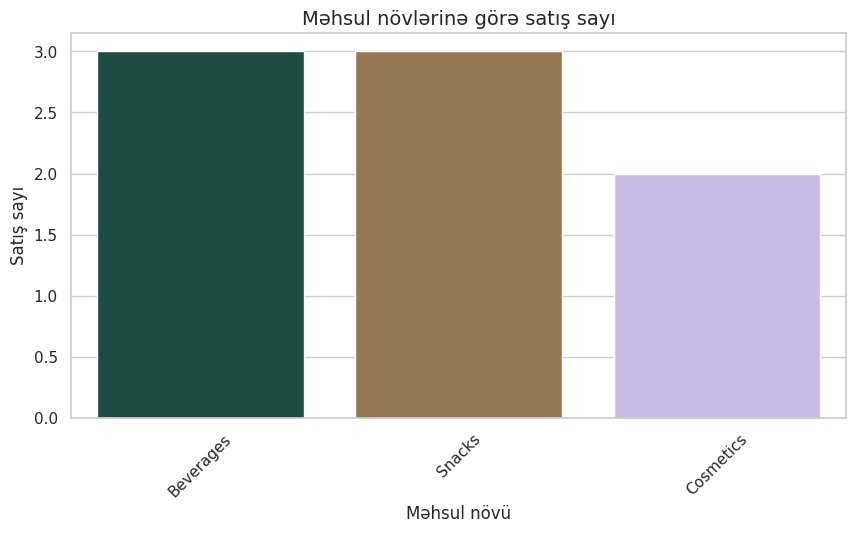

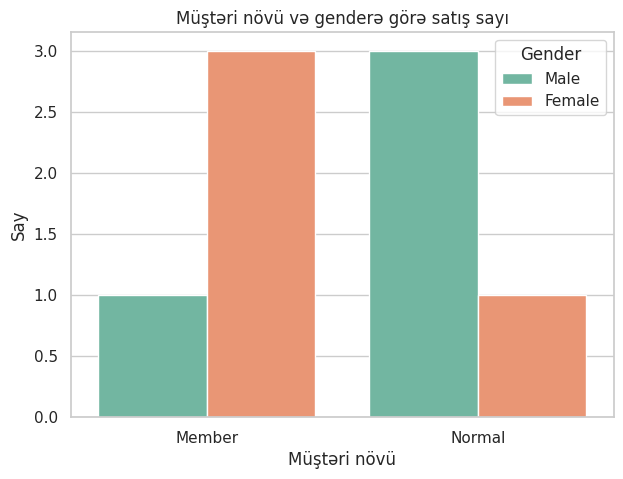

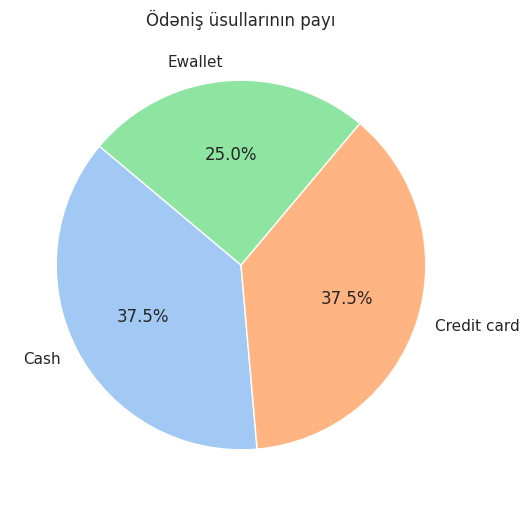

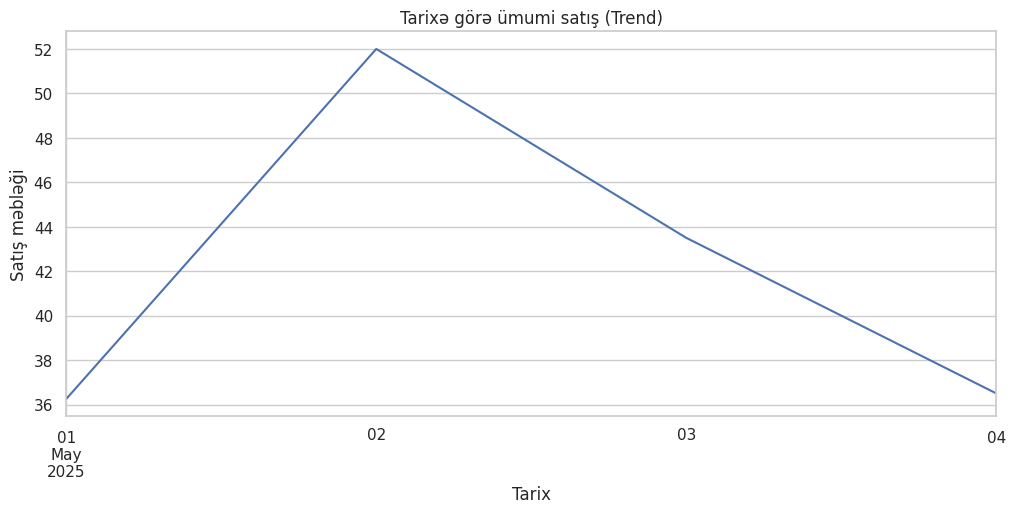

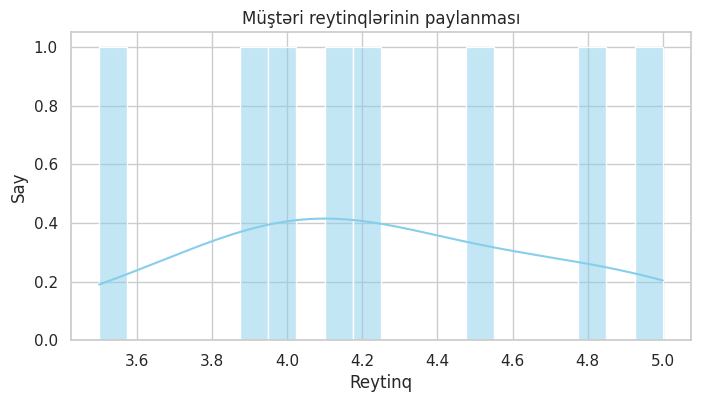

<ipython-input-1-711879b23b30>:82: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
<ipython-input-1-711879b23b30>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


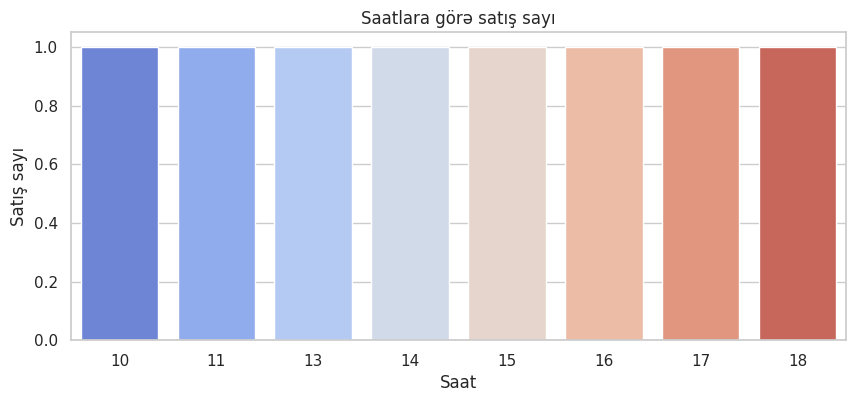

<ipython-input-1-711879b23b30>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='mako')


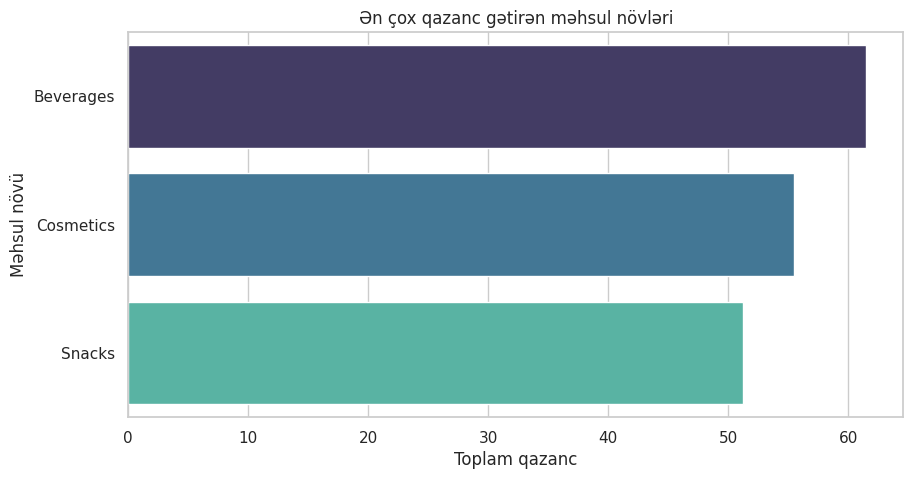

In [1]:
# Lazım olan kitabxanaları idxal edirik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Numune data - Umico market satış məlumatları
data = {
    'Invoice ID': ['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008'],
    'City': ['Baku', 'Ganja', 'Sumqayit', 'Baku', 'Ganja', 'Baku', 'Sumqayit', 'Ganja'],
    'Product line': ['Beverages', 'Snacks', 'Cosmetics', 'Beverages', 'Snacks', 'Cosmetics', 'Beverages', 'Snacks'],
    'Customer type': ['Member', 'Normal', 'Member', 'Normal', 'Member', 'Normal', 'Member', 'Normal'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Payment': ['Cash', 'Credit card', 'Ewallet', 'Cash', 'Credit card', 'Ewallet', 'Cash', 'Credit card'],
    'Date': ['2025-05-01', '2025-05-01', '2025-05-02', '2025-05-02', '2025-05-03', '2025-05-03', '2025-05-04', '2025-05-04'],
    'Time': ['14:00', '15:30', '11:00', '16:45', '13:20', '10:10', '17:00', '18:30'],
    'Total': [20.5, 15.75, 30.0, 22.0, 18.0, 25.5, 19.0, 17.5],
    'Rating': [4.5, 4.0, 5.0, 3.5, 4.2, 4.8, 3.9, 4.1]
}

df = pd.DataFrame(data)

# 1. Şəhərlərə görə satış sayı
city_sales = df['City'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')
plt.title("Şəhərlərə görə satış sayı", fontsize=14)
plt.xlabel("Şəhər")
plt.ylabel("Satış sayı")
plt.show()

# 2. Məhsul növlərinə görə satış sayı
product_sales = df['Product line'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='cubehelix')
plt.title("Məhsul növlərinə görə satış sayı", fontsize=14)
plt.xlabel("Məhsul növü")
plt.ylabel("Satış sayı")
plt.xticks(rotation=45)
plt.show()

# 3. Müştəri növü və genderə görə satış sayı
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Customer type', hue='Gender', palette='Set2')
plt.title("Müştəri növü və genderə görə satış sayı")
plt.xlabel("Müştəri növü")
plt.ylabel("Say")
plt.show()

# 4. Ödəniş üsulları üzrə pay
payment_counts = df['Payment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Ödəniş üsullarının payı")
plt.show()

# 5. Satış tarixləri üzrə trend
df['Date'] = pd.to_datetime(df['Date'])  # tarix formatına çevir
daily_sales = df.groupby('Date')['Total'].sum()

plt.figure(figsize=(12, 5))
daily_sales.plot()
plt.title("Tarixə görə ümumi satış (Trend)")
plt.xlabel("Tarix")
plt.ylabel("Satış məbləği")
plt.grid(True)
plt.show()

# 6. Müştəri reytinqlərinin paylanması
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title("Müştəri reytinqlərinin paylanması")
plt.xlabel("Reytinq")
plt.ylabel("Say")
plt.show()

# 7. Saatlara görə satış sayı
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

plt.figure(figsize=(10, 4))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title("Saatlara görə satış sayı")
plt.xlabel("Saat")
plt.ylabel("Satış sayı")
plt.show()

# 8. Ən çox qazanc gətirən məhsullar
top_products = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='mako')
plt.title("Ən çox qazanc gətirən məhsul növləri")
plt.xlabel("Toplam qazanc")
plt.ylabel("Məhsul növü")
plt.show()
